#  ANALYSIS OF Covid-19 DATASET

For this analysis we will use 3 datasets:
<br>
  - [johns-hopkins-covid-19-daily-dashboard-cases-by-country.csv](https://www.kaggle.com/roche-data-science-coalition/uncover)
  - [covid_19_data.csv](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)
  - country_per_continent.csv

The first two come from kaggle and the third is a made of mine
<br>
We want to answer the following questions:
  - What is the global state of covid in the world? -
  - Is France deconfinement is a good idea?
  - Are Donald Trump actions in accord with data?

In [1]:
# import of the necessary modules and datasets define
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits.basemap import Basemap
from functions import show_countries, undo_cumulate

%matplotlib inline
datasets = ['novel-corona-virus-2019-dataset/covid_19_data.csv','countries/country_per_continent.csv', 'UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-country.csv']
print("It's done")

It's done


## World state

In [2]:
# Loading of the jhons_hopkins dataset
jh = pd.read_csv(datasets[2], parse_dates=['last_update'])   #loading of jhon_hopkins data
jh = jh.set_index(['last_update']).sort_index()

# adjust some countries name
jh.loc['2020-04-05 10:54:07', 'country_region'] = "Taiwan"
jh.loc[jh['country_region']=='US', 'country_region'] = 'United States'
jh.loc[jh['country_region']== "Cote d'Ivoire", 'country_region'] = 'Ivory Coast'
jh.loc[jh['country_region']== "Korea, South", 'country_region'] = 'South Korea'
jh.loc[jh['country_region']== "Czechia", 'country_region'] = 'Czech Republic'

# United States and Canada have a non valid number of active cases
us = jh.loc[jh['country_region']== "United States", :]
jh.loc[jh['country_region']== "United States", 'active'] = us['confirmed'] - (us['deaths'] + us['recovered'])

canada = jh.loc[jh['country_region']== "Canada", :]
jh.loc[jh['country_region']== "Canada", 'active'] = canada['confirmed'] - (canada['deaths'] + canada['recovered'])

# Loading of the country-per-continent dataset
cc = pd.read_csv(datasets[1])
cc = cc.set_index('N')

# Adding a continent column by merging the two datasets
jh = pd.merge(jh, cc, left_on='country_region', right_on='country').drop('country', axis=1)

# Little look
print(jh.head(), jh.describe(), sep='\n')   #Short insight of the data
print('Data for ' + str(len(jh['country_region'].unique())) + ' countries')

  country_region        lat        long  confirmed  deaths  recovered  active  \
0          China  30.592800  114.305500      82602    3333      77207    2062   
1         Taiwan  23.700000  121.000000        363       5         50     308   
2         Israel  31.046051   34.851612       8018      48        477    7493   
3      Mauritius -20.348404   57.552152        227       7          7     213   
4         Mexico  23.634500 -102.552800       1890      79        633    1178   

       continent  
0           Asia  
1           Asia  
2           Asia  
3         Africa  
4  North America  
              lat        long      confirmed        deaths     recovered  \
count  180.000000  180.000000     180.000000    180.000000    180.000000   
mean    20.536779   16.943581    6952.983333    378.527778   1432.644444   
std     23.632628   58.100837   30305.887149   1802.942426   7239.471970   
min    -40.900600 -102.552800       1.000000      0.000000      0.000000   
25%      6.426991  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


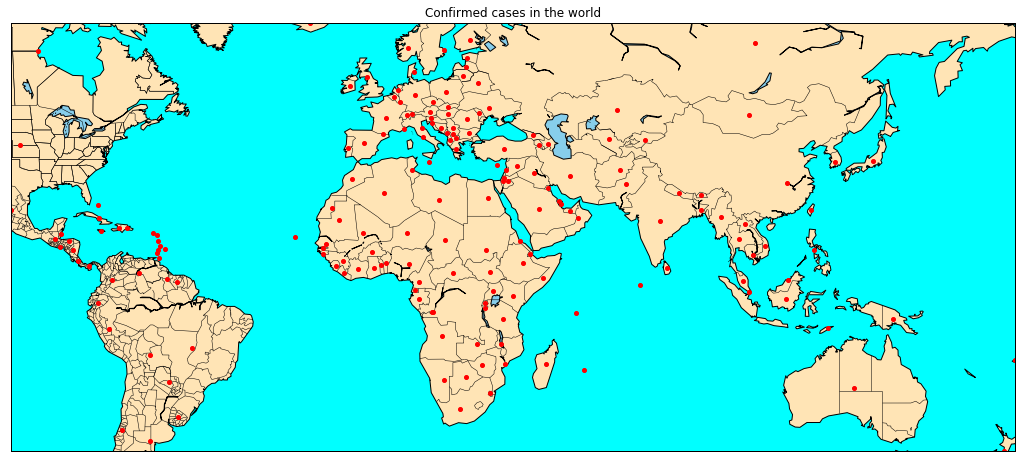

In [3]:
mapcoord = { 'llcrnrlat': jh['lat'].min(), 'urcrnrlat': jh['lat'].max(), 'llcrnrlon': jh['long'].min(), 'urcrnrlon': jh['long'].max()}
#basemap for each case
fig = plt.figure(figsize=(18, 16), edgecolor='w')
m = Basemap(projection='mill', resolution='c',
**mapcoord, )

m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='#FFE4B5', lake_color='#87CEEB')
m.drawmapboundary(fill_color='#00FFFF')

for lat, long in jh[['lat', 'long']].values:
    x, y = m(long, lat)
    
    plt.plot(x, y, markersize=4, color='red', marker='o')

plt.title('Confirmed cases in the world')
plt.show()

On 2020-04-05 we have 1251537 confirmed, 68135 deaths, 257876 recovered and 925526 active cases in the world.
Below we can see the proportion of deaths, recovered and active case in the world


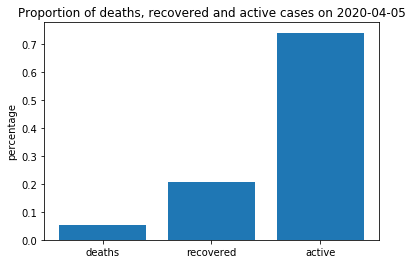

In [4]:
# Selecting the differentes cases
confirmed = jh['confirmed'].sum()
deaths = jh['deaths'].sum()
recovered = jh['recovered'].sum()
active = jh['active'].sum()

# Number of cases
print("On 2020-04-05 we have "+str(confirmed)+" confirmed, "+str(deaths)+" deaths, "+str(recovered)+" recovered and "+str(active)+" active cases in the world.")
print("Below we can see the proportion of deaths, recovered and active case in the world")

# Making the proportion and plot
proportion = np.array([deaths/confirmed, recovered/confirmed, active/confirmed])
plt.bar(np.array([10, 12.5, 15]), height=proportion, width=2, tick_label=['deaths', 'recovered', 'active'])
plt.ylabel('percentage')
plt.title('Proportion of deaths, recovered and active cases on 2020-04-05')
plt.show()

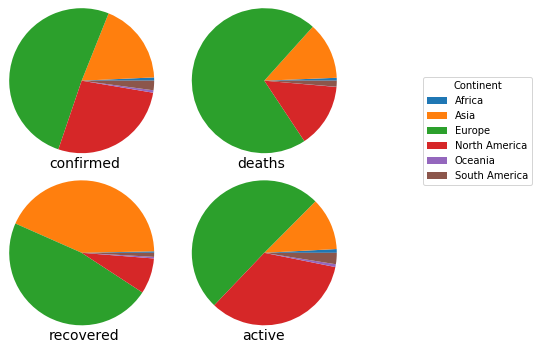


Number of each cases per continent
               confirmed  deaths  recovered  active
continent                                          
Africa              9032     437        870    7725
Asia              228088    8651     110992  108445
Europe            636386   48363     122267  465756
North America     344739    9741      20538  314460
Oceania             6739      36        913    5790
South America      26553     907       2296   23350


In [5]:
# Group cases by cotinent
group_jh_continent = jh.groupby('continent').sum().drop(['lat','long'], axis=1)

# Selecting the differents cases by continent
jh_con_confirmed = group_jh_continent['confirmed']
jh_con_deaths = group_jh_continent['deaths']
jh_con_recovered = group_jh_continent['recovered']
jh_con_active = group_jh_continent['active']
labels = group_jh_continent.index

# Making figure and axes
fig, ax = plt.subplots(2,2)
fig.subplots_adjust(hspace=2.8)

# Making confirmed cases bar chart
ax[0][0].pie(jh_con_confirmed, labels=labels, radius=4, labeldistance=None)
ax[0][0].text(-1.8,-4.8, 'confirmed',fontsize=14)

# Making deaths cases bar chart
ax[0][1].pie(jh_con_deaths, labels=labels, radius=4, labeldistance=None)
ax[0][1].text(-1.5,-4.8, 'deaths',fontsize=14)

# Making recovered cases bar chart
ax[1][0].pie(jh_con_recovered, labels=labels, radius=4, labeldistance=None)
ax[1][0].text(-1.8,-4.8, 'recovered',fontsize=14)

# Making active cases baar chart
ax[1][1].pie(jh_con_active, labels=labels, radius=4, labeldistance=None)
ax[1][1].text(-1.2,-4.8, 'active',fontsize=14)

# Add legend and show bar chart
plt.legend(title='Continent', loc=(4,2))
plt.show()

print()
print('Number of each cases per continent')
print(group_jh_continent)

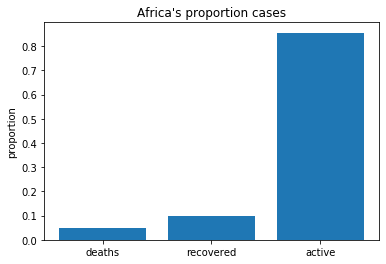

Proportion for each cases:
[0.04838353 0.09632418 0.85529229]


In [6]:
# Selecting Africa's cases
jh_africa = group_jh_continent.loc['Africa',:]

proportion = np.array([jh_africa['deaths']/jh_africa['confirmed'], jh_africa['recovered']/jh_africa['confirmed'], jh_africa['active']/jh_africa['confirmed']])

# Making the proportion bar chart
plt.bar(np.array([10, 12.5, 15]), height=proportion, width=2, tick_label=['deaths', 'recovered', 'active'])
plt.ylabel('proportion')
plt.title("Africa's proportion cases")
plt.show()

print('Proportion for each cases:')
print(proportion)

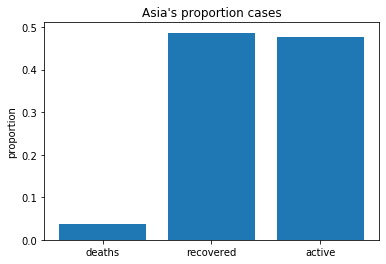

Proportion for each cases:
[0.03792834 0.4866192  0.47545246]


In [7]:
# Selecting Asia's cases
jh_asia = group_jh_continent.loc['Asia',:]

proportion = np.array([jh_asia['deaths']/jh_asia['confirmed'], jh_asia['recovered']/jh_asia['confirmed'], jh_asia['active']/jh_asia['confirmed']])

# Making the proportion bar chart
plt.bar(np.array([10, 12.5, 15]), height=proportion, width=2, tick_label=['deaths', 'recovered', 'active'])
plt.ylabel('proportion')
plt.title("Asia's proportion cases")
plt.show()

print('Proportion for each cases:')
print(proportion)

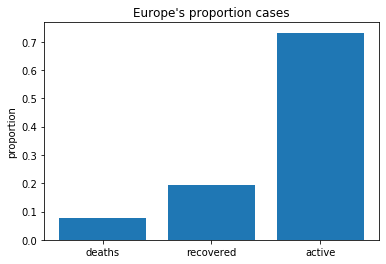

Proportion for each cases:
[0.07599633 0.19212711 0.73187657]


In [8]:
# Selecting Europe's cases
jh_europe = group_jh_continent.loc['Europe',:]

proportion = np.array([jh_europe['deaths']/jh_europe['confirmed'], jh_europe['recovered']/jh_europe['confirmed'], jh_europe['active']/jh_europe['confirmed']])

# Making the proportion bar chart
plt.bar(np.array([10, 12.5, 15]), height=proportion, width=2, tick_label=['deaths', 'recovered', 'active'])
plt.ylabel('proportion')
plt.title("Europe's proportion cases")
plt.show()

print('Proportion for each cases:')
print(proportion)

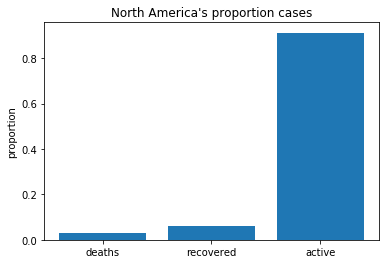

Proportion for each cases:
[0.02825616 0.0595755  0.91216834]


In [9]:
# Selecting North America's cases
jh_namerica = group_jh_continent.loc['North America',:]

proportion = np.array([jh_namerica['deaths']/jh_namerica['confirmed'], jh_namerica['recovered']/jh_namerica['confirmed'], jh_namerica['active']/jh_namerica['confirmed']])

# Making the proportion bar chart
plt.bar(np.array([10, 12.5, 15]), height=proportion, width=2, tick_label=['deaths', 'recovered', 'active'])
plt.ylabel('proportion')
plt.title("North America's proportion cases")
plt.show()

print('Proportion for each cases:')
print(proportion)

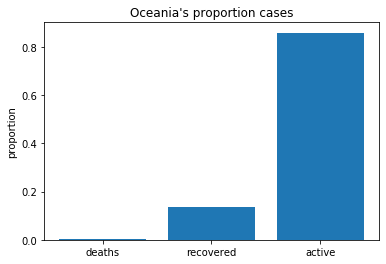

Proportion for each cases:
[0.00534204 0.13548004 0.85917792]


In [10]:
# Selecting Oceania's cases
jh_oceania = group_jh_continent.loc['Oceania',:]

proportion = np.array([jh_oceania['deaths']/jh_oceania['confirmed'], jh_oceania['recovered']/jh_oceania['confirmed'], jh_oceania['active']/jh_oceania['confirmed']])

# Making the proportion bar chart
plt.bar(np.array([10, 12.5, 15]), height=proportion, width=2, tick_label=['deaths', 'recovered', 'active'])
plt.ylabel('proportion')
plt.title("Oceania's proportion cases")
plt.show()

print('Proportion for each cases:')
print(proportion)

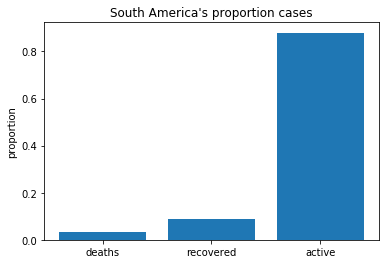

Proportion for each cases:
[0.0341581  0.08646857 0.87937333]


In [11]:
# Selecting South America's cases
jh_samerica = group_jh_continent.loc['South America',:]

proportion = np.array([jh_samerica['deaths']/jh_samerica['confirmed'], jh_samerica['recovered']/jh_samerica['confirmed'], jh_samerica['active']/jh_samerica['confirmed']])

# Making the proportion bar chart
plt.bar(np.array([10, 12.5, 15]), height=proportion, width=2, tick_label=['deaths', 'recovered', 'active'])
plt.ylabel('proportion')
plt.title("South America's proportion cases")
plt.show()

print('Proportion for each cases:')
print(proportion)

In [12]:
# Countries with cases over the world mean
cases = ['confirmed', 'deaths', 'recovered', 'active']
print('On 2020-04-05\n')
for case in cases:
    over_mean = jh[jh[case] > jh[case].mean()].sort_values(case, ascending=False)
    print("We have "+ str(len(over_mean)) +" countries with "+case+" cases over the world mean, order by "+case+" case:")
    show_countries(over_mean['country_region'].values, over_mean['continent'].values)
    
# Countries with confirmed, deaths, recovered and active cases over the world mean
over_mean = jh[(jh['confirmed'] > jh['confirmed'].mean()) & (jh['deaths'] > jh['deaths'].mean()) & (jh['active'] > jh['active'].mean())].sort_values('confirmed', ascending=False)
print("We have "+ str(len(over_mean['country_region'])) +" countries with confirmed, deaths and active cases over the world mean, order by confirmed cases:")
show_countries(over_mean['country_region'].values, over_mean['continent'].values)
    
# Countries with proportion (deaths, recovered, active) cases over 0.5
for case in cases[1:]:
    over_half = jh[(jh[case]/jh['confirmed']) > 0.5].sort_values(case, ascending=False)
    print("We have "+ str(len(over_half['country_region'])) +" countries with relative "+case+" proportion cases over 50%.")
    show_countries(over_half['country_region'].values, over_half['continent'].values)

# Countries with recovered cases over active cases
values = jh[jh['active']<jh['recovered']].sort_values('recovered')[['country_region', 'continent']]
countries, continents = values['country_region'].values, values['continent'].values
print("We have "+str(len(countries))+" countries with recovered cases over active cases:")
show_countries(countries, continents)

# Countries with recovered cases under deaths cases
values = jh[ (jh['recovered']<jh['deaths'])].sort_values('deaths')[['country_region', 'continent']]
countries, continents = values['country_region'].values, values['continent'].values
print("We have "+str(len(countries))+" countries with relative recovered cases under relative deaths cases, order by deaths cases:")
show_countries(countries, continents)


On 2020-04-05

We have 18 countries with confirmed cases over the world mean, order by confirmed case:
   1- United States  ( North America )
   2- Spain  ( Europe )
   3- Italy  ( Europe )
   4- Germany  ( Europe )
   5- France  ( Europe )
   6- China  ( Asia )
   7- Iran  ( Asia )
   8- United Kingdom  ( Europe )
   9- Turkey  ( Asia )
   10- Switzerland  ( Europe )
   11- Belgium  ( Europe )
   12- Netherlands  ( Europe )
   13- Canada  ( North America )
   14- Austria  ( Europe )
   15- Portugal  ( Europe )
   16- Brazil  ( South America )
   17- South Korea  ( Asia )
   18- Israel  ( Asia )

We have 14 countries with deaths cases over the world mean, order by deaths case:
   1- Italy  ( Europe )
   2- Spain  ( Europe )
   3- United States  ( North America )
   4- France  ( Europe )
   5- United Kingdom  ( Europe )
   6- Iran  ( Asia )
   7- China  ( Asia )
   8- Netherlands  ( Europe )
   9- Germany  ( Europe )
   10- Belgium  ( Europe )
   11- Switzerland  ( Europe )
   12- Turke

## What about France and United States

In [13]:
# loading novel-corona-virus dataset and cleanup
nvc19 = pd.read_csv(datasets[0], parse_dates=['ObservationDate', 'Last Update'])
nvc19 = nvc19.set_index(['ObservationDate']).sort_index()
nvc19 = nvc19.sort_values(['ObservationDate','Country/Region'])

# Little look
print(nvc19.head(), nvc19.info(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15769 entries, 2020-01-22 to 2020-04-16
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SNo             15769 non-null  int64         
 1   Province/State  7940 non-null   object        
 2   Country/Region  15769 non-null  object        
 3   Last Update     15769 non-null  datetime64[ns]
 4   Confirmed       15769 non-null  float64       
 5   Deaths          15769 non-null  float64       
 6   Recovered       15769 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 985.6+ KB
                 SNo Province/State  Country/Region         Last Update  \
ObservationDate                                                           
2020-01-22        13      Hong Kong       Hong Kong 2020-01-22 17:00:00   
2020-01-22        36            NaN           Japan 2020-01-22 17:00:00   
2020-01-22        21    

### More insight about France: Are they right to stop confinement?

In [14]:
# Selecting France cases by day
france = nvc19.loc[nvc19['Country/Region'] == 'France'].drop(['SNo','Country/Region', 'Last Update'], axis=1)
france['Active'] = france['Confirmed'] - (france['Deaths'] + france['Recovered'])
france = france.resample('D').sum()

# Selecting each cumulate case
fr_cum_confirmed = france['Confirmed']
fr_cum_deaths = france['Deaths']
fr_cum_recovered = france['Recovered']
fr_cum_active = france['Active']

# Little look 
print(france.head(), france.describe(), sep='\n')

                 Confirmed  Deaths  Recovered  Active
ObservationDate                                      
2020-01-24             2.0     0.0        0.0     2.0
2020-01-25             3.0     0.0        0.0     3.0
2020-01-26             3.0     0.0        0.0     3.0
2020-01-27             3.0     0.0        0.0     3.0
2020-01-28             4.0     0.0        0.0     4.0
           Confirmed        Deaths     Recovered        Active
count      84.000000     84.000000     84.000000     84.000000
mean    25722.273810   2413.047619   4830.261905  18478.964286
std     44040.468945   4766.978720   9108.755903  30365.623663
min         2.000000      0.000000      0.000000      2.000000
25%        11.000000      0.000000      2.000000      7.000000
50%       515.000000      7.500000     12.000000    495.500000
75%     30513.750000   1772.750000   5143.000000  23598.000000
max    147091.000000  17941.000000  33327.000000  95823.000000


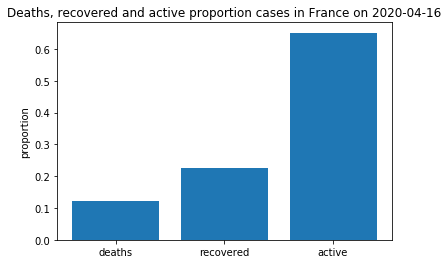

Proportion of each cases:
[0.12197211 0.22657403 0.65145386]


In [15]:
# Proportion of deaths, recovered and active cumulate cases
height = np.array([fr_cum_deaths[-1]/fr_cum_confirmed[-1], fr_cum_recovered[-1]/fr_cum_confirmed[-1], fr_cum_active[-1]/fr_cum_confirmed[-1]])

# Making the bar chart
plt.bar(np.array([10, 12.5, 15]), height=height, width=2, tick_label=['deaths', 'recovered', 'active'])
plt.ylabel('proportion')
plt.title('Deaths, recovered and active proportion cases in France on 2020-04-16')
plt.show()

print('Proportion of each cases:')
print(height)

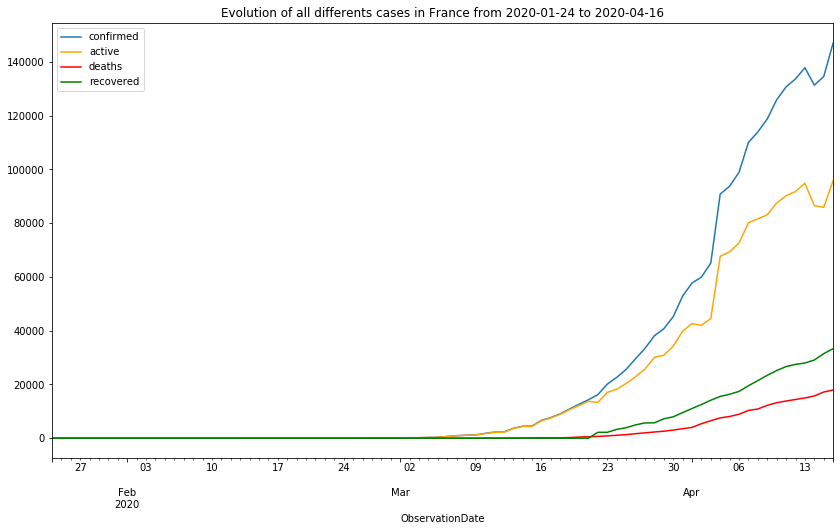

In [16]:
# Set figure size
plt.figure(figsize=(14,8))

# Plot each cumulate cases
fr_cum_confirmed.plot(label='confirmed')
fr_cum_active.plot(color='orange', label='active')
fr_cum_deaths.plot(color='red', label='deaths')
fr_cum_recovered.plot(color='green', label='recovered')

# Add title, legend and show plots
plt.title('Evolution of all differents cases in France from 2020-01-24 to 2020-04-16')
plt.legend()
plt.show()

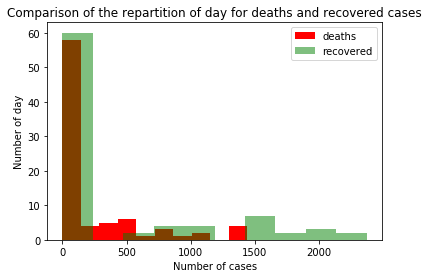

Max number of deaths and recovered cases in a day:
1440.0 2372.0


In [17]:
# Taking non cumulative deaths and recovered cases by day
fr_deaths = undo_cumulate(fr_cum_deaths)
fr_recovered = undo_cumulate(fr_cum_recovered)

# Making histogram
plt.hist(fr_deaths, color='red', label='deaths')
plt.hist(fr_recovered, color='green', alpha=0.5, label='recovered')

# Add legend, labels and title
plt.legend()
plt.xlabel('Number of cases')
plt.ylabel('Number of day')
plt.title('Comparison of the repartition of day for deaths and recovered cases')
plt.show()
print('Max number of deaths and recovered cases in a day:')
print(fr_deaths.max(), fr_recovered.max())

In [18]:
# Transform fr_deaths and fr_recovered to dataframes
fr_deaths = pd.DataFrame({'Deaths': fr_deaths}, index=france.index)
fr_recovered = pd.DataFrame({'Recovered': fr_recovered}, index=france.index)

# Number of deaths cases over recovered cases mean
arr = fr_deaths['Deaths'] > fr_recovered['Recovered'].mean()
dor = np.sum(arr)
dday = fr_deaths[arr].index

# Number of recovered cases over confirmed cases mean
arr = fr_recovered['Recovered'] > undo_cumulate(fr_cum_recovered).mean()
roc = np.sum(arr)
rday = fr_recovered[arr].index

# Number of day with deaths cases over recovered cases
arr = fr_deaths['Deaths']>fr_recovered['Recovered']
dr = np.sum(arr)
day = fr_recovered[arr].index

print("We have "+str(dor)+" deaths cases over recovered cases mean:")
print()
for date in dday:
    print(date, end=' || ')

print()
print()

print("We have "+str(roc)+" recovered cases over confirmed cases mean:")
print()
for date in rday:
    print(date, end=' || ')
    
print()
print()

print("We have "+str(dr)+" days with deaths cases over recovered cases:")
print()
for date in day:
    print(date, end=' || ')

We have 18 deaths cases over recovered cases mean:

2020-03-30 00:00:00 || 2020-03-31 00:00:00 || 2020-04-01 00:00:00 || 2020-04-02 00:00:00 || 2020-04-03 00:00:00 || 2020-04-04 00:00:00 || 2020-04-05 00:00:00 || 2020-04-06 00:00:00 || 2020-04-07 00:00:00 || 2020-04-08 00:00:00 || 2020-04-09 00:00:00 || 2020-04-10 00:00:00 || 2020-04-11 00:00:00 || 2020-04-12 00:00:00 || 2020-04-13 00:00:00 || 2020-04-14 00:00:00 || 2020-04-15 00:00:00 || 2020-04-16 00:00:00 || 

We have 24 recovered cases over confirmed cases mean:

2020-03-22 00:00:00 || 2020-03-24 00:00:00 || 2020-03-25 00:00:00 || 2020-03-26 00:00:00 || 2020-03-27 00:00:00 || 2020-03-29 00:00:00 || 2020-03-30 00:00:00 || 2020-03-31 00:00:00 || 2020-04-01 00:00:00 || 2020-04-02 00:00:00 || 2020-04-03 00:00:00 || 2020-04-04 00:00:00 || 2020-04-05 00:00:00 || 2020-04-06 00:00:00 || 2020-04-07 00:00:00 || 2020-04-08 00:00:00 || 2020-04-09 00:00:00 || 2020-04-10 00:00:00 || 2020-04-11 00:00:00 || 2020-04-12 00:00:00 || 2020-04-13 00:00:

### Conclusion
The situation in France is going to be stable, so they do right to stop confinement and it's very fine that they do it slowly

### More insight about USA: Does Donald Trump behavior is justify?

In [19]:
# Selecting United States cases by day
us = nvc19.loc[nvc19['Country/Region'] == 'US'].drop(['SNo','Country/Region', 'Last Update'], axis=1)
us['Active'] = us['Confirmed'] - (us['Deaths'] + us['Recovered'])
us = us.resample('D').sum()

# Selecting each cumulate case
us_cum_confirmed = us['Confirmed']
us_cum_deaths = us['Deaths']
us_cum_recovered = us['Recovered']
us_cum_active = us['Active']

# Little look
print(us.head(), us.describe(), sep='\n')

                 Confirmed  Deaths  Recovered  Active
ObservationDate                                      
2020-01-22             1.0     0.0        0.0     1.0
2020-01-23             1.0     0.0        0.0     1.0
2020-01-24             2.0     0.0        0.0     2.0
2020-01-25             2.0     0.0        0.0     2.0
2020-01-26             5.0     0.0        0.0     5.0
           Confirmed        Deaths     Recovered         Active
count      86.000000     86.000000     86.000000      86.000000
mean    95234.255814   3259.813953   5350.453488   86623.988372
std    181910.587904   7291.070540  12474.079690  162757.459503
min         1.000000      0.000000      0.000000       1.000000
25%        13.500000      0.000000      3.000000      12.000000
50%       187.000000     11.500000      7.500000     167.500000
75%     79321.500000   1142.250000    601.000000   77578.250000
max    667801.000000  32916.000000  54703.000000  580182.000000


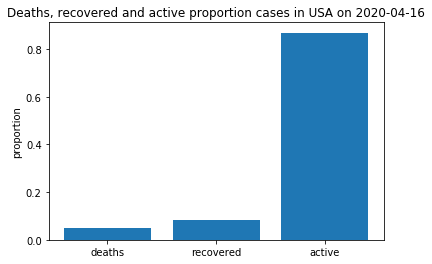

Proportion of each cases:
[0.04929013 0.08191512 0.86879475]


In [20]:
# Proportion of deaths, recovered and active cumulate cases
height = np.array([us_cum_deaths[-1]/us_cum_confirmed[-1], us_cum_recovered[-1]/us_cum_confirmed[-1], us_cum_active[-1]/us_cum_confirmed[-1]])

# Making the bar chart
plt.bar(np.array([10, 12.5, 15]), height=height, width=2, tick_label=['deaths', 'recovered', 'active'])
plt.ylabel('proportion')
plt.title('Deaths, recovered and active proportion cases in USA on 2020-04-16')
plt.show()

print('Proportion of each cases:')
print(height)

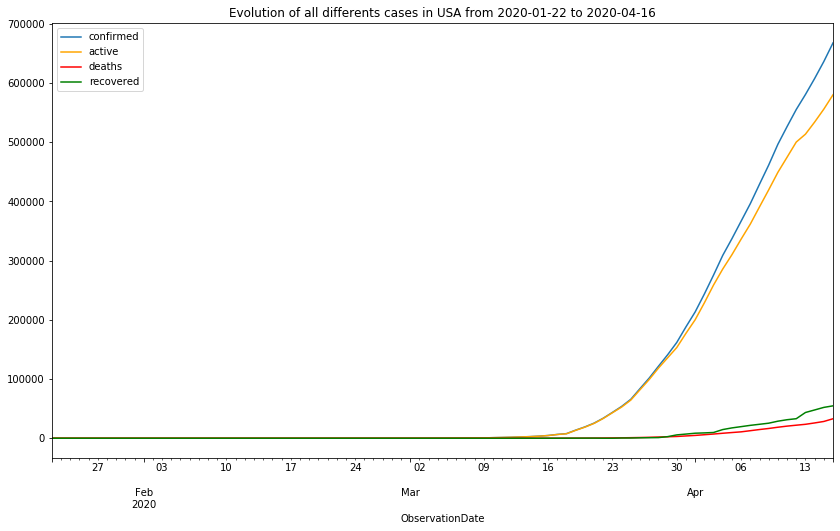

In [21]:
# Set figure size
plt.figure(figsize=(14,8))

# Plot each cumulate cases
us_cum_confirmed.plot(label='confirmed')
us_cum_active.plot(color='orange', label='active')
us_cum_deaths.plot(color='red', label='deaths')
us_cum_recovered.plot(color='green', label='recovered')

# Add title, legend and show plots
plt.title('Evolution of all differents cases in USA from 2020-01-22 to 2020-04-16')
plt.legend()
plt.show()

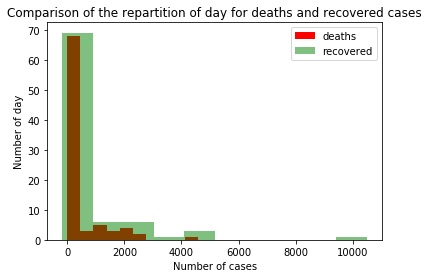

Proportion of each cases:
4591.0 10494.0


In [22]:
# Taking non cumulative deaths and recovered cases by day
us_deaths = undo_cumulate(us_cum_deaths)
us_recovered = undo_cumulate(us_cum_recovered)

# Making histogram
plt.hist(us_deaths, color='red', label='deaths')
plt.hist(us_recovered, color='green', alpha=0.5, label='recovered')

# Add legend, labels and title
plt.legend()
plt.xlabel('Number of cases')
plt.ylabel('Number of day')
plt.title('Comparison of the repartition of day for deaths and recovered cases')
plt.show()

print('Proportion of each cases:')
print(us_deaths.max(), us_recovered.max())

In [23]:
# Transform us_deaths and us_recovered to dataframes
us_deaths = pd.DataFrame({'Deaths': us_deaths}, index=us.index)
us_recovered = pd.DataFrame({'Recovered': us_recovered}, index=us.index)

# Number of deaths cases over recovered cases mean
arr = us_deaths['Deaths'] > us_recovered['Recovered'].mean()
dor = np.sum(arr)
dday = us_deaths[arr].index

# Number of recovered cases over confirmed cases mean
arr = us_recovered['Recovered'] > undo_cumulate(us_cum_recovered).mean()
roc = np.sum(arr)
rday = us_recovered[arr].index

# Number of day with deaths cases over recovered cases
arr = us_deaths['Deaths']>us_recovered['Recovered']
dr = np.sum(arr)
day = us_recovered[arr].index

print("We have "+str(dor)+" deaths cases over recovered cases mean:")
print()
for date in dday:
    print(date, end=' || ')

print()
print()

print("We have "+str(roc)+" recovered cases over confirmed cases mean:")
print()
for date in rday:
    print(date, end=' || ')
    
print()
print()

print("We have "+str(dr)+" days with deaths cases over recovered cases:")
print()
for date in day:
    print(date, end=' || ')

We have 17 deaths cases over recovered cases mean:

2020-03-31 00:00:00 || 2020-04-01 00:00:00 || 2020-04-02 00:00:00 || 2020-04-03 00:00:00 || 2020-04-04 00:00:00 || 2020-04-05 00:00:00 || 2020-04-06 00:00:00 || 2020-04-07 00:00:00 || 2020-04-08 00:00:00 || 2020-04-09 00:00:00 || 2020-04-10 00:00:00 || 2020-04-11 00:00:00 || 2020-04-12 00:00:00 || 2020-04-13 00:00:00 || 2020-04-14 00:00:00 || 2020-04-15 00:00:00 || 2020-04-16 00:00:00 || 

We have 18 recovered cases over confirmed cases mean:

2020-03-29 00:00:00 || 2020-03-30 00:00:00 || 2020-03-31 00:00:00 || 2020-04-01 00:00:00 || 2020-04-03 00:00:00 || 2020-04-04 00:00:00 || 2020-04-05 00:00:00 || 2020-04-06 00:00:00 || 2020-04-07 00:00:00 || 2020-04-08 00:00:00 || 2020-04-09 00:00:00 || 2020-04-10 00:00:00 || 2020-04-11 00:00:00 || 2020-04-12 00:00:00 || 2020-04-13 00:00:00 || 2020-04-14 00:00:00 || 2020-04-15 00:00:00 || 2020-04-16 00:00:00 || 

We have 27 days with deaths cases over recovered cases:

2020-02-29 00:00:00 || 2020

### Conclusion
The situation in USA is not stable and seem to be pretty bad. The behaviour of Trump is not in accord with data, he must take more preventive decision.